<a href="https://colab.research.google.com/github/gharbiaziz10/Diabetes-prediction/blob/main/Diabetes_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn. linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score , recall_score , f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [13]:
data = pd.read_csv("diabetes.csv")

# EDA

In [14]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [16]:
data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [17]:
data.shape

(768, 9)

In [18]:
data.duplicated().sum()

0

In [19]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

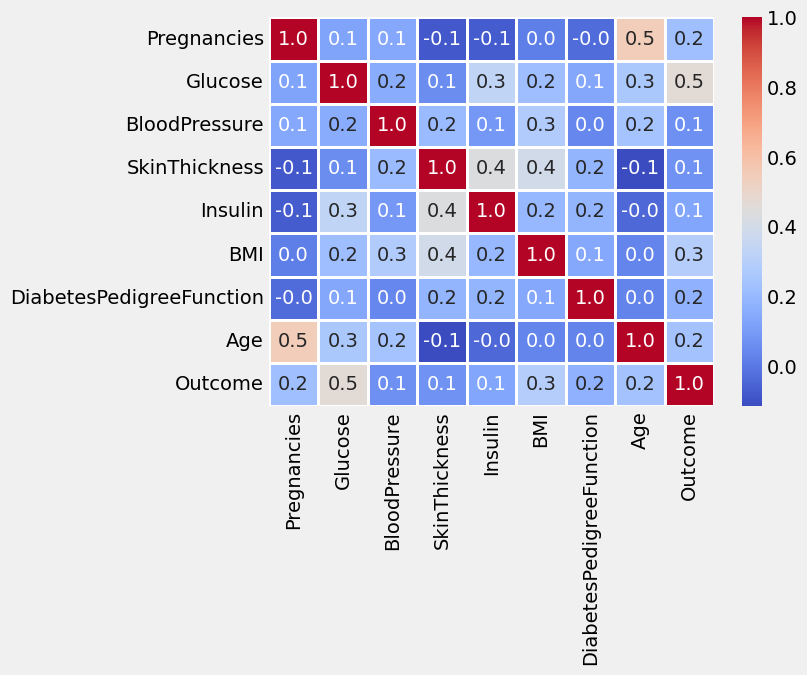

In [25]:
sns.heatmap(data.corr(),annot=True,cmap='coolwarm',fmt='.1f',linewidths=2)

<Axes: xlabel='Outcome', ylabel='count'>

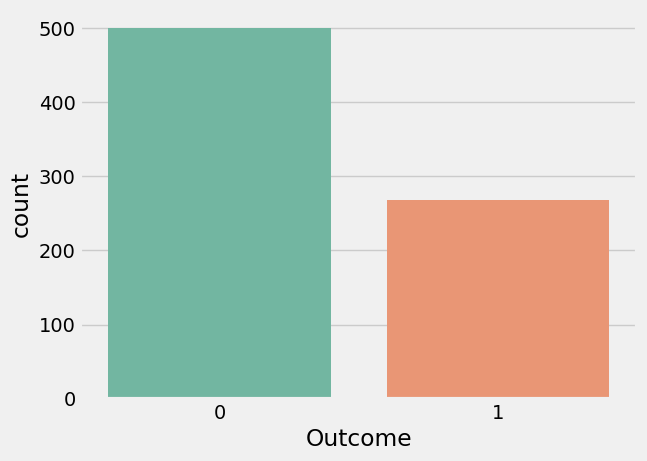

In [33]:
sns.countplot(x='Outcome',data=data,palette='Set2')

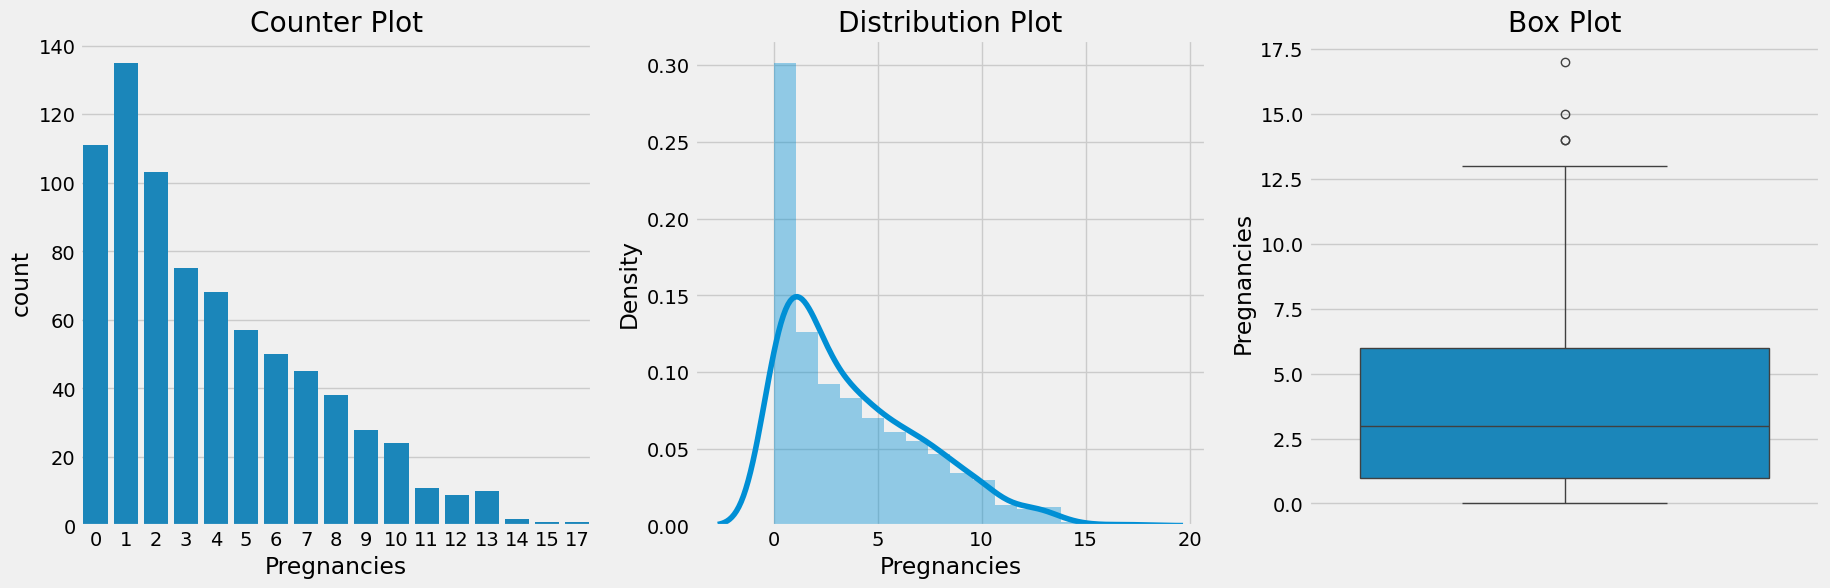

In [34]:
plt.figure(figsize=(20,6))

plt.subplot(1,3,1)
plt.title("Counter Plot")
sns.countplot(x = 'Pregnancies',data = data)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
sns.distplot(data["Pregnancies"])

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=data["Pregnancies"])

plt.show()

<Axes: ylabel='Age'>

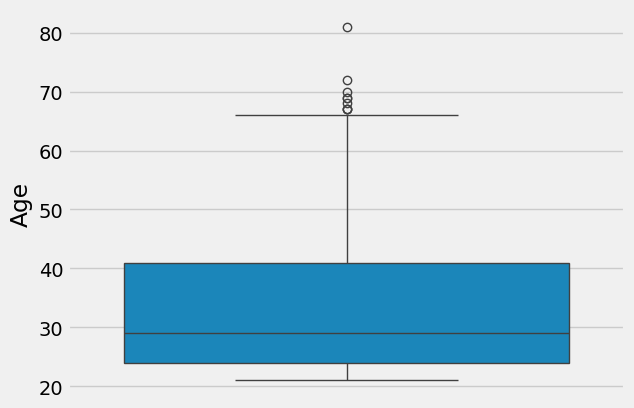

In [37]:
sns.boxplot(data.Age)

# Model

**Logistic** **Regression**

In [39]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [66]:
models=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
models_accuracy=[]
models_recall=[]
models_f1=[]

In [41]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [42]:
y_pred=model.predict(x_test)

In [67]:
print(model)
print(classification_report(y_test,y_pred))
models_accuracy.append(accuracy_score(y_test,y_pred))
models_recall.append(recall_score(y_test,y_pred))
models_f1.append(f1_score(y_test,y_pred))

LogisticRegression()
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



<Axes: >

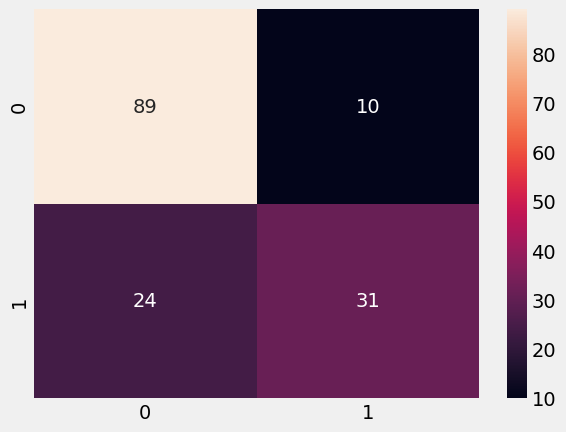

In [49]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')

**SVC**

In [50]:
model2=SVC()
model2.fit(x_train,y_train)

SVC()

In [51]:
y_pred2=model2.predict(x_test)

SVC()
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.82      0.51      0.63        55

    accuracy                           0.79       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.79      0.79      0.77       154



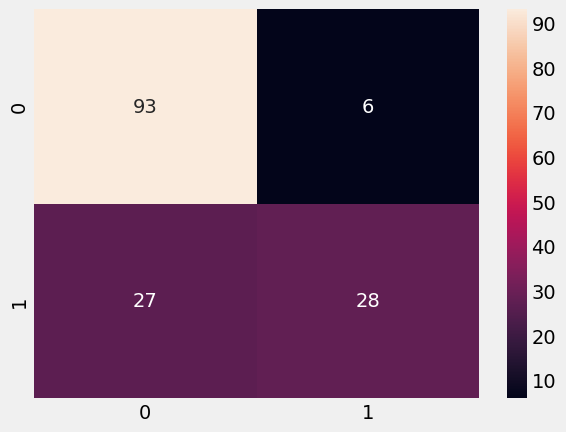

In [68]:
print(model2)
print(classification_report(y_test,y_pred2))
sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt='d')
models_accuracy.append(accuracy_score(y_test,y_pred2))
models_recall.append(recall_score(y_test,y_pred2))
models_f1.append(f1_score(y_test,y_pred2))

**Random Forest Classifier**

In [53]:
model3=RandomForestClassifier()
model3.fit(x_train,y_train)

RandomForestClassifier()

In [54]:
y_pred3=model3.predict(x_test)

RandomForestClassifier()
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        99
           1       0.74      0.62      0.67        55

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.78      0.79      0.78       154



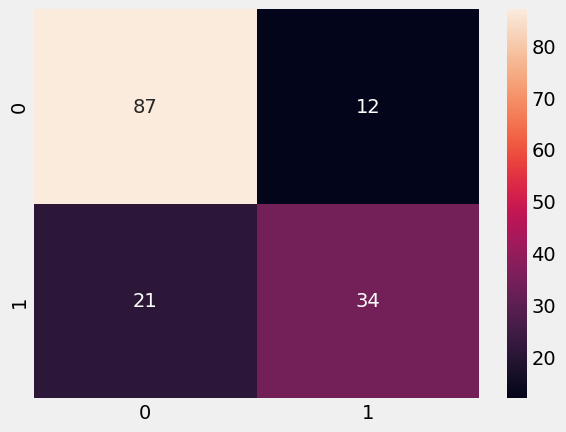

In [69]:
print(model3)
print(classification_report(y_test,y_pred3))
sns.heatmap(confusion_matrix(y_test,y_pred3),annot=True,fmt='d')
models_accuracy.append(accuracy_score(y_test,y_pred3))
models_recall.append(recall_score(y_test,y_pred3))
models_f1.append(f1_score(y_test,y_pred3))

In [62]:
model4=GradientBoostingClassifier()
model4.fit(x_train,y_train)

GradientBoostingClassifier()

In [63]:
y_pred4=model4.predict(x_test)

GradientBoostingClassifier()
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        99
           1       0.76      0.64      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



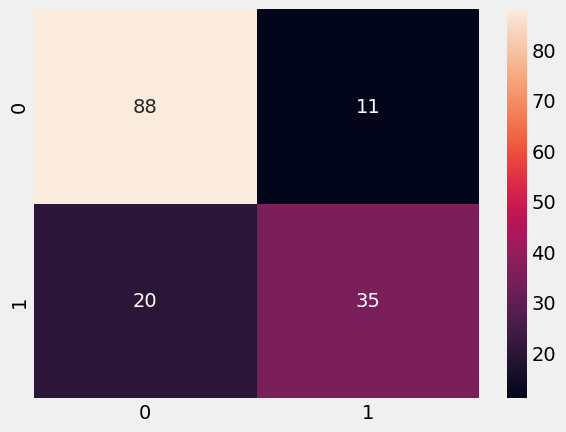

In [70]:
print(model4)
print(classification_report(y_test,y_pred4))
sns.heatmap(confusion_matrix(y_test,y_pred4),annot=True,fmt='d')
models_accuracy.append(accuracy_score(y_test,y_pred4))
models_recall.append(recall_score(y_test,y_pred4))
models_f1.append(f1_score(y_test,y_pred4))

In [71]:
models_accuracy

[0.7792207792207793,
 0.7857142857142857,
 0.7857142857142857,
 0.7987012987012987]

In [72]:
models_recall

[0.5636363636363636, 0.509090909090909, 0.6181818181818182, 0.6363636363636364]

In [73]:
models_f1

[0.6458333333333333, 0.6292134831460674, 0.6732673267326733, 0.693069306930693]

In [74]:
models

['LogisticRegression',
 'SVC',
 'RandomForestClassifier',
 'GradientBoostingClassifier']

In [75]:
pd.DataFrame({'Model':models,'Accuracy':models_accuracy,'Recall':models_recall,'F1':models_f1})

,Model,Accuracy,Recall,F1
0,LogisticRegression,0.779221,0.563636,0.645833
1,SVC,0.785714,0.509091,0.629213
2,RandomForestClassifier,0.785714,0.618182,0.673267
3,GradientBoostingClassifier,0.798701,0.636364,0.693069


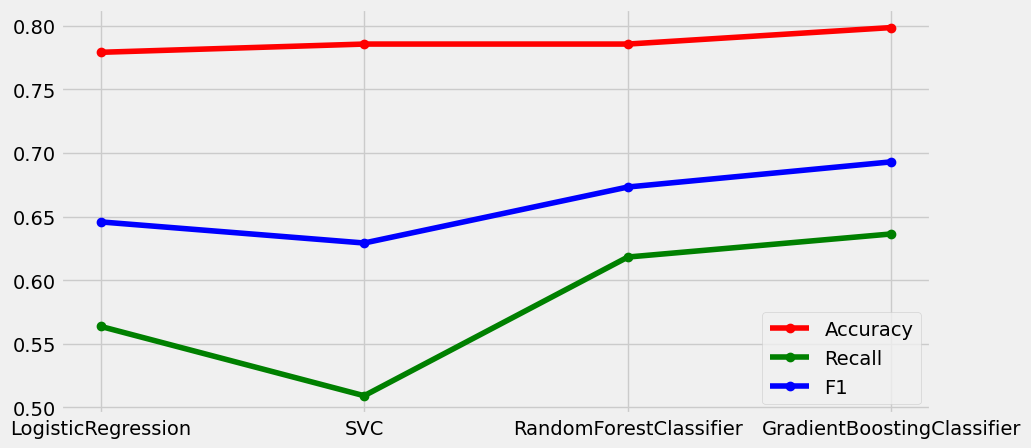

In [83]:
fig,ax =plt.subplots(figsize=(10,5))
plt.plot(models,models_accuracy,marker='o',color='r',label='Accuracy')
plt.plot(models,models_recall,marker='o',color='g',label='Recall')
plt.plot(models,models_f1,marker='o',color='b',label="F1")
plt.legend()
plt.show()